# Movielens Dataset: General Data Analysis 

### Reforming and visualizing the data to create useful and easily interpretable information 

#### Sections:

##### 1) Getting familiar with the data size

##### 2) Users' rating distribution of the movies 

##### 3) Most popular genres among movie producers

##### 4) Getting familiar with the data size




In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Section 1 

##### Getting familiar with the data size

In [5]:
movies_list = pd.read_csv('E:\MAID\ADSA_pro\code\movies.csv')
movies_ratings = pd.read_csv('E:\MAID\ADSA_pro\code\Ratings.csv')
movies_ratings = movies_ratings.drop(columns='timestamp')
movies_stats = pd.read_csv('E:\MAID\ADSA_pro\code\movies_stats.csv')


In [6]:
# Getting some general statistics on the the dataset
total_movies = movies_list['movieId'].nunique()
rated_movies  = movies_ratings['movieId'].nunique()
num_users  = movies_ratings['userId'].nunique()
num_ratings  = movies_ratings.shape[0]
print ('total number of movies is : '+str(total_movies))
print ('\nnumber of rated movies is : '+str(rated_movies))
print ('\ntotal number of users is : '+str(num_users))
print ('\ntotal number of rating is : '+str(num_ratings))

total number of movies is : 62423

number of rated movies is : 59047

total number of users is : 162541

total number of rating is : 25000095


### Section 2

##### Users' rating distribution of the movies 

In [8]:
from collections import Counter

most_rated = Counter(movies_ratings['movieId'])
most_rated= dict(sorted(most_rated.items(), key=lambda item: item[1],reverse=True))

In [9]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
movies_stats.to_sql('movies_stats',con=engine)
most_rated_list = list(most_rated.keys())[:5]
print('Top rated movies in the dataset are :\n ')
for indx in most_rated_list:
    movie_name = pd.read_sql("SELECT title FROM movies_stats where movieId=={}".format(indx),con=engine)
    movie_rating = pd.read_sql("SELECT average FROM movies_stats where movieId=={}".format(indx),con=engine)
    print('{} | Avg Rating: {}'.format(movie_name['title'].iloc[0], round(movie_rating['average'].iloc[0],2)))

Top rated movies in the dataset are :
 
Forrest Gump (1994) | Avg Rating: 4.05
Shawshank Redemption, The (1994) | Avg Rating: 4.41
Pulp Fiction (1994) | Avg Rating: 4.19
Silence of the Lambs, The (1991) | Avg Rating: 4.15
Matrix, The (1999) | Avg Rating: 4.15


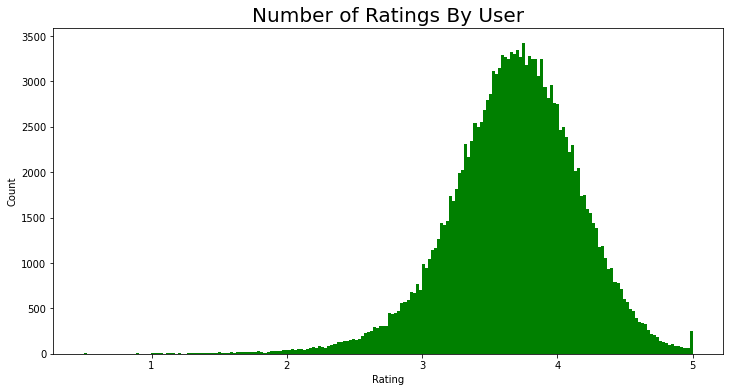

In [10]:
plt.figure(figsize=(12,6))
ratings_dist = movies_ratings.drop(columns='movieId').groupby('userId')
plt.hist(ratings_dist['rating'].mean(), bins=(200), color='green')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of Ratings By User',fontsize = 20)
plt.show()


### Section 3

##### Most popular genres among movie producers

In [14]:
genre_list = movies_list['genres'].str.split('|')
genre_list_flat = []
for sublist in genre_list:
    for item in sublist:
        genre_list_flat.append(item)

In [15]:
from collections import Counter
genre_count = Counter(genre_list_flat)
del genre_count["(no genres listed)"]
genre_count= dict(sorted(genre_count.items(), key=lambda item: item[1],reverse=True))

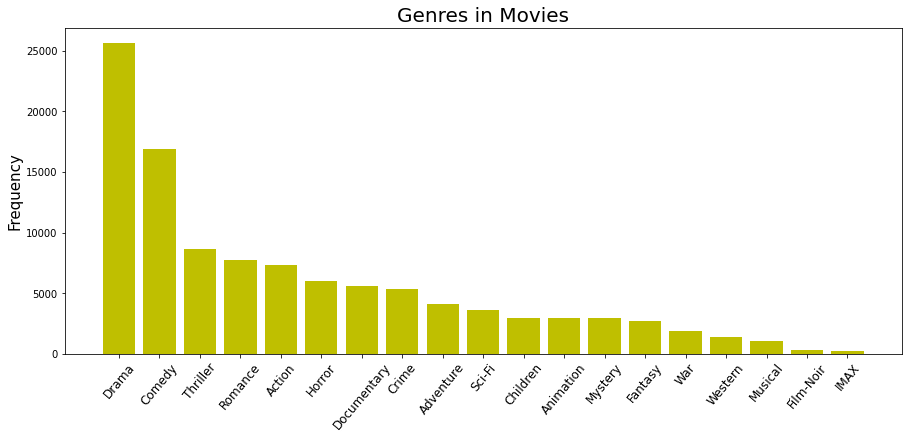

In [16]:
plt.figure(figsize=(15,6))

plt.bar(genre_count.keys(), genre_count.values(),  color='y')
plt.xticks(rotation=50, fontsize = 12)
plt.title("Genres in Movies",fontsize = 20)
plt.ylabel("Frequency", fontsize = 15)

plt.show()

### Section 4

##### Checking rating distribution for a specific movie

In [20]:

movie_id = 99
random_movie_data = movies_ratings[movies_ratings.movieId== movie_id]

In [21]:
movie_name = movies_list[movies_list.movieId== movie_id]
movie_name['title'].iloc[0]

'Heidi Fleiss: Hollywood Madam (1995)'

In [27]:
total_votes = random_movie_data['rating'].count()

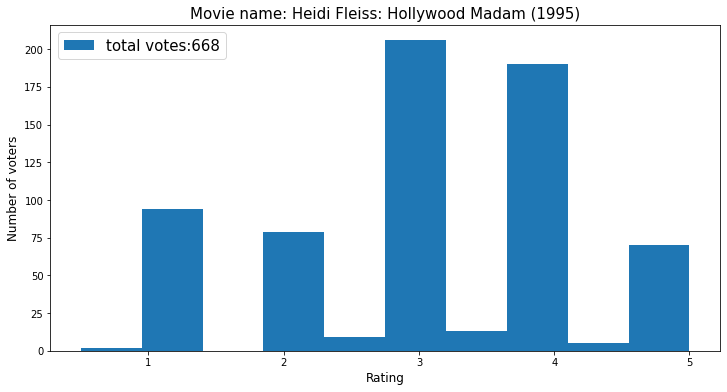

In [37]:
plt.figure(figsize=(12,6))

plt.hist(random_movie_data['rating'],bins = 10,label="total votes:"+str(total_votes))
plt.title("Movie name: "+ movie_name['title'].iloc[0],fontsize = 15)
plt.ylabel("Number of voters", fontsize = 12)
plt.xlabel("Rating", fontsize = 12)
plt.legend(fontsize=15, loc='upper left')


plt.show()